In [1]:
import torch
import torch.nn as nn
from dataloaders import load_cifar10
from trainer import Trainer, compute_loss_and_accuracy
from task2 import create_plots, output_features
import numpy as np

In [2]:
class ExampleModel(nn.Module):

    def __init__(self,
                 image_channels,
                 num_classes):
        """
            Is called when model is initialized.
            Args:
                image_channels. Number of color channels in image (3)
                num_classes: Number of classes we want to predict (10)
        """
        super().__init__()
        # TODO: Implement this function (Task  2a)
        #Number of filters in conv layers
        num_filters1 = 32; num_filters2 = 64; num_filters3 = 128; num_filters4 = 128
        kernel_conv = 3; stride_conv = 1; padding_conv = 2
        kernel_pool = 2; stride_pool = 2
        
        
        self.num_classes = num_classes
        # Define the convolutional layers
        self.feature_extractor = nn.Sequential(
            nn.Conv2d(in_channels=image_channels, out_channels=num_filters1, kernel_size= kernel_conv,stride=stride_conv,padding=padding_conv),
            nn.BatchNorm2d(num_filters1),
            nn.ReLU(), 
            #nn.MaxPool2d(kernel_size=kernel_pool, stride = stride_pool),
            
            nn.Conv2d(in_channels=num_filters1,  out_channels=num_filters2, kernel_size=kernel_conv,stride=stride_conv,padding=padding_conv),
            nn.BatchNorm2d(num_filters2),
            nn.ReLU(), 
            #nn.MaxPool2d(kernel_size=kernel_pool, stride = stride_pool),
           
            nn.Conv2d(in_channels=num_filters2,   out_channels=num_filters3, kernel_size=kernel_conv,stride=stride_conv,padding=padding_conv),
            nn.BatchNorm2d(num_filters3),
            nn.ReLU(), 
            #nn.MaxPool2d(kernel_size=kernel_pool, stride = stride_pool),
            
            nn.Conv2d(in_channels=num_filters3,   out_channels=num_filters4, kernel_size=kernel_conv,stride=stride_conv,padding=padding_conv),
            nn.BatchNorm2d(num_filters4),
            nn.ReLU(), 
            #nn.MaxPool2d(kernel_size=kernel_pool, stride = stride_pool)
            
            )

        
        # The output of feature_extractor will be [batch_size, num_filters, 16, 16]
        #self.num_output_features = 32*32*32

        filters_list = [num_filters1, num_filters2, num_filters3, num_filters4]
        out2 = num_filters1
        for filter in filters_list:
             out_channels = filter
             out1 = np.floor((out2 + 2*padding_conv - kernel_conv) / stride_conv) + 1
             out2 = np.floor((out1 - kernel_pool) / stride_pool) + 1
             self.num_output_features = int(out_channels * out2 * out2)

        #self.num_output_features = output_features(num_filters1, num_filters2, num_filters3, num_filters4,kernel_conv, stride_conv, padding_conv, kernel_pool, stride_pool)
        linear_filter1 = 64

        # Initialize our last fully connected layer
        # Inputs all extracted features from the convolutional layers
        # Outputs num_classes predictions, 1 for each class.
        # There is no need for softmax activation function, as this is
        # included with nn.CrossEntropyLoss
        self.classifier = nn.Sequential(
            #nn.Linear(self.num_output_features, num_classes),
            nn.Linear(self.num_output_features, self.num_output_features),
            nn.BatchNorm1d(self.num_output_features),
            nn.ReLU(),
            nn.Linear(self.num_output_features, linear_filter1),
            nn.BatchNorm1d(linear_filter1),
            nn.ReLU(),
            nn.Linear(linear_filter1, num_classes))
      

    def forward(self, x):
        """
        Performs a forward pass through the model
        Args:
            x: Input image, shape: [batch_size, 3, 32, 32]
        """
        batch_size = x.shape[0]
        out = self.feature_extractor(x)
        out = out.view(batch_size, -1)
        out = self.classifier(out)        
        expected_shape = (batch_size, self.num_classes)
        assert out.shape == (batch_size, self.num_classes),\
            f"Expected output of forward pass to be: {expected_shape}, but got: {out.shape}"
        return out

In [3]:
#With batch norm in classifier
#With augment_triain in augmented train
#With L2 regularisation 
#With Momentum 

epochs = 10
batch_size = 64
learning_rate = 5e-2 # Should be 5e-5 for LeNet
early_stop_count = 4

new_mean_std = False 
resize = 0
transform = 'flip'
dataloaders = load_cifar10(resize, new_mean_std, transform , batch_size)


l2_reg_lambda = 0.005 #1e-5
momentum = 0.08 
optimizer = 'SGD'
model = ExampleModel(image_channels=3, num_classes=10)
trainer = Trainer(batch_size, learning_rate, early_stop_count, epochs, model, dataloaders, l2_reg_lambda, momentum, optimizer)

trainer.train()


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
ExampleModel(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(128, 128, kernel_size=(3,

In [4]:
#With batch norm in classifier
#With augment_triain in augmented train
#With L2 regularisation 
#Without Momentum 

epochs = 10
batch_size = 64
learning_rate = 5e-2 # Should be 5e-5 for LeNet
early_stop_count = 4

new_mean_std = False 
resize = 0
transform = 'flip'
dataloaders = load_cifar10(resize, new_mean_std, transform , batch_size)


l2_reg_lambda = 0.005 #1e-5
momentum = 0 #0.08 
optimizer = 'SGD'
model = ExampleModel(image_channels=3, num_classes=10)
trainer = Trainer(batch_size, learning_rate, early_stop_count, epochs, model, dataloaders, l2_reg_lambda, momentum, optimizer)

trainer.train()


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
ExampleModel(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(128, 128, kernel_size=(3,

In [3]:
#With batch norm in classifier
#With augment_triain in augmented train
#With L2 regularisation 
#Without Momentum 
#With only 2 layers classifier

epochs = 10
batch_size = 64
learning_rate = 5e-2 # Should be 5e-5 for LeNet
early_stop_count = 4

new_mean_std = False 
resize = 0
transform = 'flip'
dataloaders = load_cifar10(resize, new_mean_std, transform , batch_size)


l2_reg_lambda = 0.005 #1e-5
momentum = 0 #0.08 
optimizer = 'SGD'
model = ExampleModel(image_channels=3, num_classes=10)
trainer = Trainer(batch_size, learning_rate, early_stop_count, epochs, model, dataloaders, l2_reg_lambda, momentum, optimizer)

trainer.train()


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
ExampleModel(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(128, 128, kernel_size=(3,

In [4]:
import time
#With batch norm in classifier
#With augment_triain in augmented train
# AAA
epochs = 10
batch_size = 64
learning_rate = 5e-2 # Should be 5e-5 for LeNet
early_stop_count = 4

new_mean_std = False 
resize = 0
transform = 'flip'
dataloaders = load_cifar10(resize, new_mean_std, transform , batch_size)


l2_reg_lambda = 0.0 #1e-5
momentum = 0.0 
optimizer = 'SGD'
model = ExampleModel(image_channels=3, num_classes=10)
trainer = Trainer(batch_size, learning_rate, early_stop_count, epochs, model, dataloaders, l2_reg_lambda, momentum, optimizer)

trainer.train()


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
ExampleModel(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(128, 128, kernel_size=(3,

In [6]:
import time
#With batch norm in classifier
#With augment_triain in augmented train
# bbb
epochs = 10
batch_size = 64
learning_rate = 5e-3# Should be 5e-5 for LeNet
early_stop_count = 4

new_mean_std = False 
resize = 0
transform = 'flip'
dataloaders = load_cifar10(resize, new_mean_std, transform , batch_size)


l2_reg_lambda = 0.0 #1e-5
momentum = 0.0 
optimizer = 'SGD'
model = ExampleModel(image_channels=3, num_classes=10)
trainer = Trainer(batch_size, learning_rate, early_stop_count, epochs, model, dataloaders, l2_reg_lambda, momentum, optimizer)

trainer.train()

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
ExampleModel(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(128, 128, kernel_size=(3,

In [ ]:
import time
#With batch norm in classifier
#With data_triain in augmented train

epochs = 10
batch_size = 64
learning_rate = 5e-2 # Should be 5e-5 for LeNet
early_stop_count = 4

new_mean_std = False 
resize = 0
transform = 'flip'
dataloaders = load_cifar10(resize, new_mean_std, transform , batch_size)


l2_reg_lambda = 0.0 #1e-5
momentum = 0.0 
optimizer = 'SGD'
model = ExampleModel(image_channels=3, num_classes=10)
trainer = Trainer(batch_size, learning_rate, early_stop_count, epochs, model, dataloaders, l2_reg_lambda, momentum, optimizer)

trainer.train()

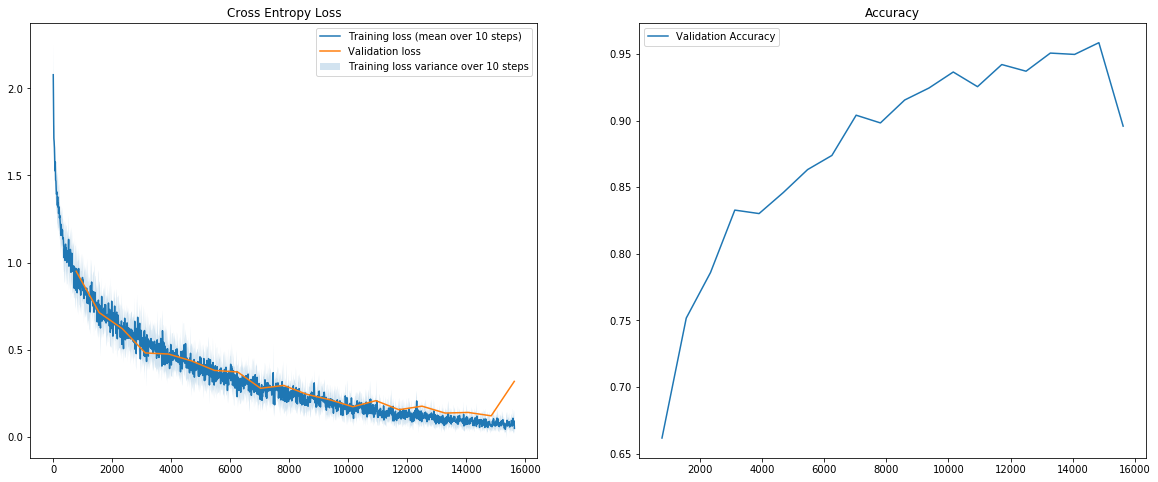

In [4]:
create_plots(trainer, "task3")

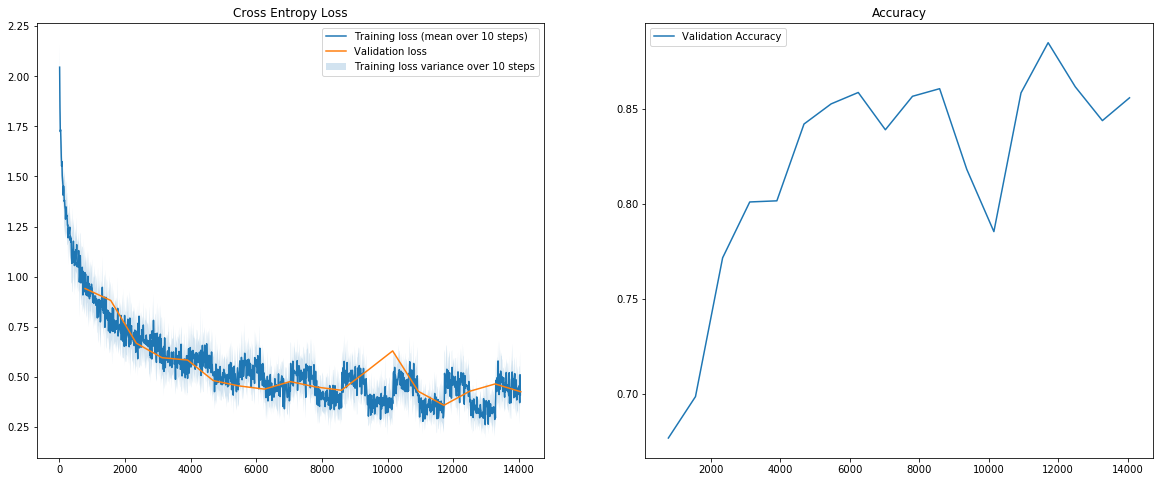

In [5]:
create_plots(trainer, "task3") #With batch norm in classifier
#With augment_triain in augmented train
#With L2 regularisation 
#Without Momentum 

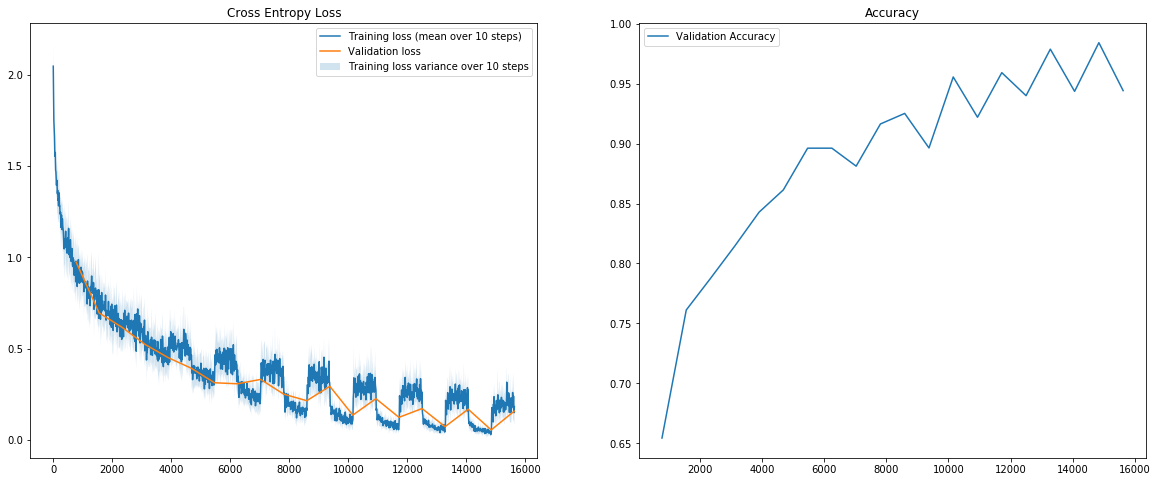

In [5]:
# AAA
create_plots(trainer, "task3") 

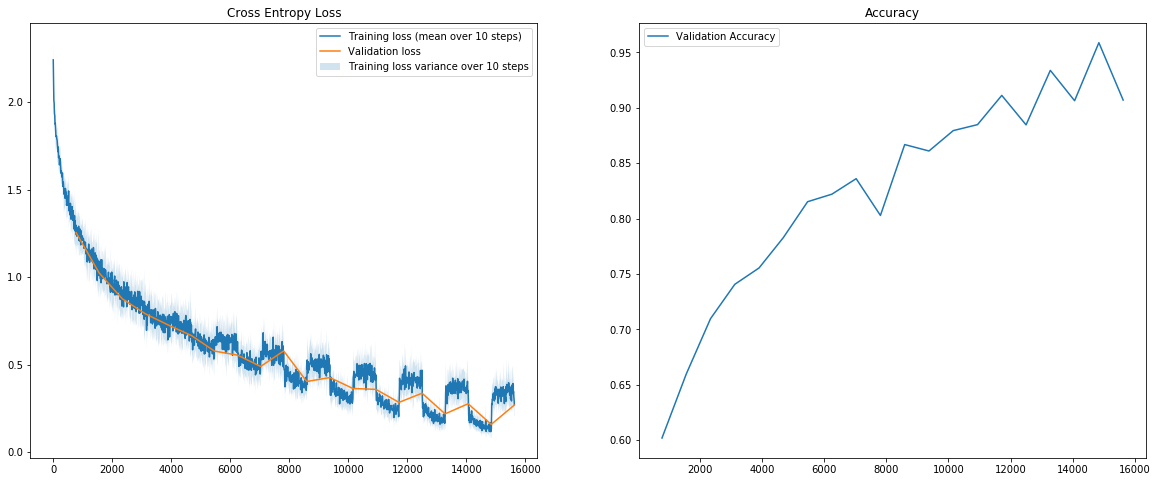

In [7]:
# bbb
create_plots(trainer, "task3") 